<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Metodos_Numericos_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello')

hello


**Este Colab Python esta em branco (não está mais!!!!!!!!!!) propositalmente**

#Problemas de "root finding"

## Método bisection

Dada uma função contínua e um intervalo de procura que contém a raíz, o método consiste em iterar divisões deste intervalo, testando se os subintervalos contém a raíz, até encontrá-la.

Abaixo, exemplo de implementação:

In [ ]:
def bisection(f, a, b, max_iter):
    """
    Implementação do método de bisection
    ------------------------------------
       
    Parâmetros:
    ----------
    f : função para a qual se quer achar a raíz
    a: limite inferior
    b: limite superior
    max_iter: número de iterações

    Retorna:
    -------
    O ponto no qual f(x) =~ 0
    
    """
    
    # se zero não parece estar contido dentro do intervalo, aborta
    if f(a) * f(b) >= 0:
        print("f(a) * f(b) >= 0, abortando.")
        return None

    # começa iteração, testando se zero está dentro dos intervalos testados
    for i in range(1, max_iter + 1):
        # calcula middle point em torno do intervalo
        mp = (a + b) / 2
        f_mp = f(mp)

        if f(a) * f_mp < 0:
            b = mp

        elif f(b) * f_mp < 0:
            a = mp

        # solução exata encontrada, não precisa continuar iterando
        elif f_mp == 0:
            print("Solução exata encontrada:")
            return mp

    # retorna aproximação se atingir max_iter, não encontrando solução exata
    print("Solução aproximada:")
    return (a + b) / 2

Como exemplo do uso do método, vamos considerar a seguinte função:

$b(x) = e^x - e^{3.1415}$

Aplicando o método:

In [ ]:
from numpy import exp

f = lambda x: exp(x) - exp(3.1415)

print(bisection(f, 0, 4, 100))

Solução exata encontrada:
3.1415


Obs: essa notação de lambda é uma versão reduzida de uma função tradicional/usual em python como *def f(x):*. 

Assim, o mesmo código poderia ser: 

In [ ]:
from numpy import exp

def ff(x): 
  return exp(x) - exp(3.1415)

print(bisection(ff, 0, 4, 100))

Solução exata encontrada:
3.1415


## Método de Newton

*TODO: breve explicação do método.*

Abaixo, exemplo de implementação:

In [ ]:
import sys

def newton(f, df, x0, epsilon, max_iter):
    """
    Implementação do método de Newton para encontrar raízes de funções
    -------------------------------------------------------------------

    Parâmetros:
    ----------
    f: função a ser analisada
    df: primeira derivada de f(x)
    x0: chute inicial
    epsilon: tolerância
    max_iter: número máximo de iterações

    Retorna:
    -------
    O ponto no qual f(x) =~ 0

    """

    for n in range(1, max_iter + 1):
        f_x = f(x0)

        # se condição de convergência satisfeita, achou solução aproximada
        if abs(f_x) < epsilon:
            print("Solução encontrada após ", n, " iterações.")
            return(x0)

        df_x = df(x0)
        
        # tenta dividir f_x/df_x, gerando erro caso a derivada seja zero
        try:
            x0 = x0 - f_x/df_x
        except ZeroDivisionError:
            print("Derivada igual a zero, abortando!")
            sys.exit(1)

    print("Solução não encontrada, max_iter excedido.")
    return "Solução não encontrada"

Como exemplo do uso do método, vamos considerar a seguinte função:

$y(x) = x^{-5} - x^{-3}  - 3.1415$

Primeiro, plotamos a função:



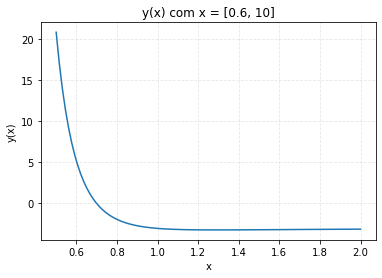

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# definindo a função y(x) e sua derivada
y = lambda x: x ** (-5) - x ** (-3) - 3.1415
dy = lambda x: - 5 * x ** (-6) + 3 ** (-4)

# gerando grid equidistante para o eixo x do gráfico
x = np.linspace(0.5, 2, 100)
y_ = y(x)

# criando o gráfico de D(X)
plt.plot(x, y_)
plt.title('y(x) com x = [0.6, 10]')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

Do gráfico, um bom chute inicial parece ser x = 1.

Com o chute inicial definido, aplicamos o método:

In [ ]:
import numpy as np

# parâmetros do processo de otimização
tol = 1e-10
max_iter = 10**10

# do gráfico, um bom chute inicial parece ser 0.7
print(newton(y, dy, 1, tol, max_iter))

Solução encontrada após  27  iterações.
0.6964929860426182


Alguns desses métodos já estão obviamente encapsulados em bibliotecas, não precisando ser implementados do zero, igual fizemos, para fins didáticos, à cima. 

Exemplo do método de Bisection utilizando a biblioteca *scipy*:

In [ ]:
import scipy.optimize as opt

def yy(x): 
  return x ** (-5) - x ** (-3) - 3.1415

def dyy(x): 
  return -5 * x ** (-6) + 3 ** (-4)

raiz = opt.root_scalar(yy , bracket=[0.1, 4], method='bisect')
print(raiz)

      converged: True
           flag: 'converged'
 function_calls: 43
     iterations: 41
           root: 0.6964929860419489


E, abaixo, do método de Newton:

In [ ]:
import scipy.optimize as opt

def yy(x): 
  return x ** (-5) - x ** (-3) - 3.1415

def dyy(x): 
  return -5 * x ** (-6) + 3 ** (-4)

raiz = opt.root_scalar(yy , fprime=dyy, x0=1, method='newton')
print(raiz)

      converged: True
           flag: 'converged'
 function_calls: 38
     iterations: 19
           root: 0.6964929802155978


# Maximização de uma função de Cobb-Douglas com restrição

\begin{equation*}
\begin{aligned}
& \underset{K,L}{\text{maximize}}
& bL^{\alpha}K^{1-\alpha} & \\
& \text{sujeito a}
&  mL+nK & = p.
\end{aligned}
\end{equation*}


Definindo as funções:
\begin{equation*}
\begin{aligned}
P(K,L)&=& bL^{\alpha}K^{1-\alpha}\\
g(K,L)&=&mL+nK.
\end{aligned}
\end{equation*}
O lagrangeano é definido como:
\begin{equation*}
\begin{aligned}
\ell(K,L)&=&P(K,L)-\lambda g(K,L)\\
\ell(K,L)&=& bL^{\alpha}K^{1-\alpha} -\lambda (mL+nK) \\
\end{aligned}
\end{equation*}

Calculando os gradiente e rescrevendo a equação $\nabla P=\lambda \nabla g$ implicando nas igualdades:

\begin{equation}
\begin{aligned}
P_k&=&b(1-\alpha)L^\alpha K^{-\alpha}&=&b(1-\alpha)\frac{L^\alpha}{K^\alpha}&=&\lambda n&=&\lambda g_K \\ 
P_L&=&b\alpha L^{\alpha-1} K^{1-\alpha}&=&b\alpha\frac{L^{\alpha-1}}{K^{\alpha-1}}&=&b\alpha\frac{L^{\alpha}}{K^{\alpha}}\frac{K}{L}&=&\lambda m&=&\lambda g_L\\ 
\end{aligned}
\end{equation}
dividindo as equações    
\begin{equation}
\begin{aligned}
\frac{b(1-\alpha)\frac{L^\alpha}{K^\alpha}}{b\alpha\frac{L^{\alpha}}{K^{\alpha}}\frac{K}{L}}&=&\frac{\lambda n}{\lambda m} \\ 
\frac{(1-\alpha)L}{\alpha K}&=&\frac{n}{m} \\ 
\end{aligned}
\end{equation}
usando a restrição do problema de otimização e dividindo por $m$,
\begin{equation}
\begin{aligned}
mL+nK&=&p \\ 
L+\frac{n}{m}K&=&\frac{p}{m} \\ 
L+\frac{(1-\alpha)L}{\alpha K}K&=&\frac{p}{m} \\
L+\frac{(1-\alpha)L}{\alpha}&=&\frac{p}{m} \\ 
\frac{\alpha L+(1-\alpha)L}{\alpha}&=&\frac{p}{m} \\
\frac{L}{\alpha}&=&\frac{p}{m} \\
L&=&\alpha\frac{p}{m} \\
\end{aligned}
\end{equation}
Assim, a produção máxima ocorre para os seguintes valores
\begin{equation}
\begin{aligned}
K&=&\frac{(1-\alpha)p}{n} \\
L&=&\frac{\alpha p}{m} \\
\end{aligned}
\end{equation}

In [ ]:
from scipy.optimize import minimize_scalar

b = 1
alpha = 1/3
def utilidade(K, L):
  return b * L**alpha * K**(1 - alpha)

def restricao_isolando_K(L, p, n):
  return (p - L) / n

def f_objetivo(L,  p=20, n=2):
    K = restricao_isolando_K(L, p, n)
    return -utilidade(K, L)

result = minimize_scalar(f_objetivo)
L = result.x
print('L', L)
K = restricao_isolando_K(L, p=20, n=2)
print('K' , K)
U = utilidade(K,L)
print('U', U)

L 6.666666738696083
K 6.666666630651958
U 6.666666666666667


Variando o n (multiplicador de K) ...


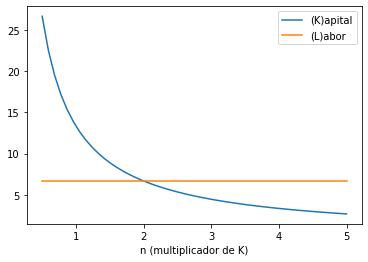

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#n originalmente 2, agora analisamos variando de 0,1 a 2.5
ns = np.linspace(0.5, 5, 50)
p = 20

# Create lists to store the results of the optimal A and B calculation
Ks = []
Ls = []
for n in ns:
    result = minimize_scalar(f_objetivo, args=(p,n))
    l = result.x
    Ls.append(l)
    Ks.append(restricao_isolando_K(l, p, n))

fig, ax = plt.subplots()

ax.plot(ns, Ks, label="(K)apital")
ax.plot(ns, Ls, label="(L)abor")
ax.set_xlabel("n (multiplicador de K)")
ax.legend()

# Introdução a Equações Diferenciais Ordinárias (EDO)  numéricas.



Nesta seção temos o objetivo de resolver Equações Diferencias de primira Ordem,
\begin{equation}
\frac{dy}{dt}= f(t, y). \tag{EDO}
\end{equation}

Seja a expansão em série de Taylor de uma funcão $y(x)$ com a regularidade necessária, isto é, a função diferenciável em $x$, então
\begin{equation}
y(x+h) = y(x) + \left.\frac{dy}{dx}\right|_x h +  \frac{1}{2!}\left.\frac{dy^2}{dx^2}\right|_x h^2+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^3+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^4+\dots+o(h^n)+\dots \tag{1}
\end{equation} 

## Método de Euler

Reescrevando a expansão de Taylor (1),
\begin{equation}
y(x+h) - y(x) =h\left( \left.\frac{dy}{dx}\right|_x  +  \frac{1}{2!}\left.\frac{d^2y}{dx^2}\right|_x h+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^2+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^3+\dots+o(h^{n-1})+\dots \tag{2}\right.
\end{equation}
\begin{equation}
\frac{y(x+h) - y(x)}{h} =\left.\frac{dy}{dx}\right|_x  +  \frac{1}{2!}\left.\frac{d^2y}{dx^2}\right|_x h+\frac{1}{3!}\left.\frac{dy^3}{dx^3}\right|_x h^2+\frac{1}{4!}\left.\frac{dy^4}{dx^4}\right|_x h^3+\dots+o(h^{n-1})+\dots \tag{3}
\end{equation}


Podemos considerar uma aproximação para a derivada primira como,
\begin{equation}
\frac{dy}{dx}  = \frac{y(x+h) - y(x)}{h} +o(h), \tag{4}
\end{equation}
Retomando a (EDO) e usando (4) teremos
\begin{equation}
\frac{y(x+h) - y(x)}{h} = f(t,y), \tag{5}
\end{equation}
realizando o algebrismo necessário encontramos o método de Euler
\begin{equation}
y(x+h) = y(x) + hf(t,y). \tag{6}
\end{equation}

Considerando o tempo discreto com passo $h$ teremos
\begin{equation}
y_{i+1} = y_i + hf(t_i,y_i). \tag{Método de Euler}
\end{equation}
note que desprezamos o termo $o(h)$ na aproximação da derivada, desta maneira podemos afirmar que realizamos uma aproximação de ordem 1. 


Definimos as seguintes funções. 

In [ ]:
def fun1_2d(t, y):
    fun1 = t - y + 2.0
    return fun1
def fun2_2d(t, y):
    fun2 = y - t**2 + 1;
    return fun2
def fun3_2d(t, y):
    fun3 = t * exp(3*t) - 2 * y
    return fun3
def fun4_2d(t, y):
    fun4 = 2 * y / t + t**2 * exp(t)
    return fun4  
def fun_solow(t, y):
    s = 0.4
    A = 1
    alpha = 0.3
    delta = 0.1
    n = 0.01
    fun_solow = s * A * y**alpha - (delta +n) * y;
    return fun_solow

In [ ]:
def sol1_exata_pvi(t):
    sol1 = exp(-t) + t + 1.0
    return sol1
def sol2_exata_pvi(t):
    sol2 = (t + 1)**2 - 0.5 * exp(t)
    return sol2
def sol3_exata_pvi(t):
    sol3 = t * t * (exp(t) - exp(1))
    return sol3
def sol4_exata_pvi(t):
    sol4 = 0.2 * t * exp(3*t) - 0.04 * exp(3*t) + 0.04 * exp(-2*t)
    return sol4    
def sol_solow(t):
    s = 0.4
    A = 1
    alpha = 0.3
    delta = 0.1
    n = 0.01  
    k0 = 10
    sol_solow = (A * s / (n + delta) + (k0**(1.0 - alpha) - A * s / (n + delta) ) * exp((alpha - 1.0) * (n + delta) * t))**(1.0 / (1.0 - alpha))
    return sol_solow

0.5
0.004046271429433368


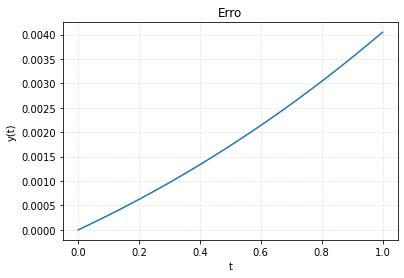

In [ ]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt

a = 0
b = 1
n = 256
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol2_exata_pvi(t[0])
print(y[0])
for i in range(1, n + 1):
	y[i] = y[i - 1] + h * fun2_2d(t[i - 1], y[i - 1])
for i in range(0, n + 1):
	sol_ex[i] = sol2_exata_pvi(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t,erro )
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

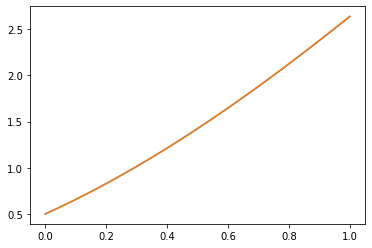

In [ ]:
plt.subplot()
plt.plot(t,y)
plt.plot(t, sol_ex)
plt.show()

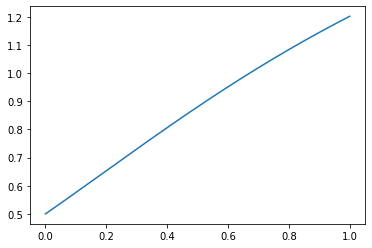

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


y0 = 0.5
t = np.linspace(0,1,256)
y = odeint(fun2_2d,y0,t)

plt.plot(t,y)
plt.show()

Na tabela mostramos o erro calculando a norma do máximo entre a solução exata e solução aproximada para cada partição $n$. Duplicamos o $n$ com objetivo de conhecer a razão entre dois erro consecutivos.

Dimensão | Euler | Razão
--- | --- | ---
n=16  |  0.06219386553919026  |   ****
n=32  |  0.03176009200263774  |   1.9582
n=64  |  0.016052576936856244 |   1.9785
n=128 |  0.00807030670580211  |   1,9890
n=256 |  0.004046271429433368 |   1,9945

Observando os dados podemos concluir que o método realmente é de ordem $1$, isto é, aumentando o $n$ em duas vezes, a razão entre erros consecutivos converge para dois. É importante notar que esse fato nos mostra uma maneira de validar nosso código.

## Método de Euler Modifiacado

9.637483867397378e-06


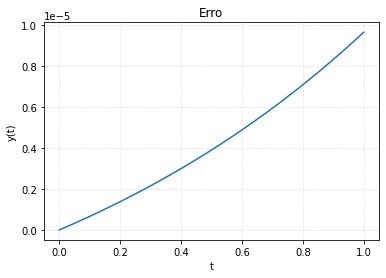

In [ ]:
a = 0
b = 1
n = 256
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol2_exata_pvi(t[0])
for i in range(1, n + 1):
  #introduzido k1 e k2
  k1 = fun2_2d(t[i - 1], y[i - 1])
  k2 = fun2_2d(t[i - 1] + h, y[i - 1] + h * k1)
  y[i] = y[i - 1] + 0.5 * h * (k1 + k2)
for i in range(0, n + 1):
	sol_ex[i] = sol2_exata_pvi(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

Na tabela mostramos o erro calculando a norma do máximo entre a solução exata e solução aproximada para cada partição  n . Duplicamos o  n  com objetivo de conhecer a razão entre dois erro consecutivos.

Dimensão | Euler | Razão
--- | --- | ---
n=16  |    0.0024069711034573338  |   ****
n=32  |  0.000609812026944212   | 3,947070   
n=64  |  0.00015345353296147834 | 3,973919
n=128 |  3.848785725635295e-05  | 3.987064 
n=256 |  9.637483867397378e-06  | 3.993559 

Observando os dados podemos concluir que o método realmente é de ordem $2$, isto é, aumentando o $n$ em duas vezes, a razão entre erros consecutivos converge para quatro. É importante notar que esse fato nos mostra uma maneira de validar nosso código.

## Método do ponto médio (Runge Kutta de ordem 2)

3.0955623593342807e-06


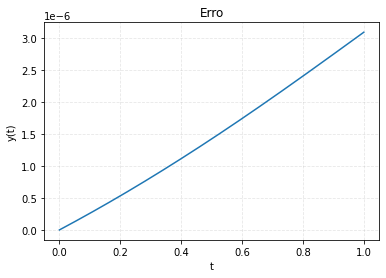

In [ ]:
a = 0
b = 1
n = 256
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol2_exata_pvi(t[0])
for i in range(1, n + 1):
  #alterado o calculo de k1 e k2
  k1 = fun2_2d(t[i - 1], y[i - 1])
  k2 = fun2_2d(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  y[i] = y[i - 1] + h * k2
for i in range(0, n + 1):
	sol_ex[i] = sol2_exata_pvi(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

Na tabela mostramos o erro calculando a norma do máximo entre a solução exata e solução aproximada para cada partição n . Duplicamos o n com objetivo de conhecer a razão entre dois erro consecutivos.

Dimensão | Euler | Razão
--- | --- | ---
n=16  |  0.0007814090556594877 |   ****
n=32  |  0.00019686739377489104 |  3.969215  
n=64  |  4.9397542677187545e-05 | 3.985368
n=128 | 1.237139418686084e-05   | 3.992884 
n=256 |  3.0955623593342807e-06 | 3.996493

Observando os dados podemos concluir que o método realmente é de ordem 2, isto é, aumentando o n em duas vezes, a razão entre erros consecutivos converge para quatro. É importante notar que esse fato nos mostra uma maneira de validar nosso código.



## Runge Kutta de 4 - ordem

5.687450510549752e-12


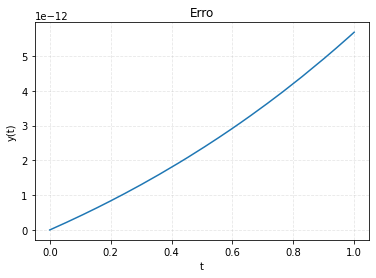

In [ ]:
a = 0
b = 1
n = 256
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol2_exata_pvi(t[0])
for i in range(1, n + 1):
  k1 = fun2_2d(t[i - 1], y[i - 1])
  k2 = fun2_2d(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  k3 = fun2_2d(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k2)
  k4 = fun2_2d(t[i - 1] +       h, y[i - 1] +       h * k3)
  y[i] = y[i - 1] + (h/6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
for i in range(0, n + 1):
	sol_ex[i] = sol2_exata_pvi(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

Na tabela mostramos o erro calculando a norma do máximo entre a solução exata e solução aproximada para cada partição  n . Duplicamos o  n  com objetivo de conhecer a razão entre dois erro consecutivos.

Dimensão | Euler | Razão
--- | --- | ---
n=16  |  3.652760169892133e-07  |   ****
n=32  |  2.3084619105162574e-08 |    15.8234
n=64  |  1.4507128831553473e-09 |    15.9126
n=128 |  9.091705166497377e-11  |    15.9564
n=256 |  5.687450510549752e-12  |    15.9856

Observando os dados podemos concluir que o método realmente é de ordem $4$, isto é, aumentando o $n$ em duas vezes, a razão entre erros consecutivos converge para dezesseis. É importante notar que esse fato nos mostra uma maneira de validar nosso código.

##Solow

Equação para o acumulo de capital, ou seja, a taxa de variação do estoque de capital é igual ao investimento menos a depreciação e menos uma taxa do capital.
\begin{equation}
\dot{K}(t)  = Y(t) - C(t) - \delta K(t), \tag{Eq. do Acumulo de capital}
\end{equation}
se 
\begin{equation}
Y(t) - C(t) =  sY(t), \tag{Eq. Auxíliar}
\end{equation}
e a razão do crescimento do trabalho é
\begin{equation}
\frac{\dot{L}(t)}{L(t)} =  n.
\end{equation}

Faremos a demostração da equação de acumulo de capital per capito. Sendo
\begin{equation}
\kappa(t) = \frac{K(t)}{L(t)},
\end{equation}
podemos escrever,
\begin{equation}
K(t) = \kappa(t) L(t),
\end{equation}
\begin{equation}
\dot{K}(t) = \dot{\kappa}(t) L(t) + \kappa(t) \dot{L}(t), \tag{Derivada do capital}
\end{equation}  
substituindo as equações da derivada do capital per capito e a equação auxiliar na equação de acumulo de capital teremos,
\begin{equation}
 \dot{\kappa}(t) L(t) + \kappa(t) \dot{L}(t) = sY(t) - \delta K(t), \\
 \dot{\kappa}(t) L(t)  = sY(t) - \delta K(t) - \kappa(t) \dot{L}(t), \\
 \dot{\kappa}(t) = s\frac{Y(t)}{L(t)} - \delta \frac{K(t)}{L(t)} - \kappa(t) \frac{\dot{L}(t)}{L(t)},
\end{equation} 
usando a razão de crescimento do trabalho, e as definições $\kappa(t)=\frac{K(t)}{L(t)}$ e $y(t)=\frac{Y(t)}{L(t)}$ podemos rescrever a equação por
\begin{equation}
 \dot{\kappa}(t) = sy(t) - \delta \kappa(t) - n\kappa(t),
\end{equation}
usando ainda $y(t)=A\kappa^\alpha$
encontrando a equação diferencial ordinária do acumulo de capital per capito,
\begin{equation}
 \dot{\kappa}(t) = sA\kappa^\alpha - (\delta + n) \kappa(t), \tag{Eq. do acumulo de capital per capito}
\end{equation} 

# Solução exata para a equação do acumulo de capital

\begin{equation}
 \kappa(t) = \left[ \frac{As}{n+\delta}+\left(k_0^{1-\alpha}-\frac{As}{n+\delta}\right)e^{(\alpha-1)(n+\delta)t}\right]^\frac{1}{1-\alpha}.
\end{equation}

# Método de Euler

0.002716099117161974


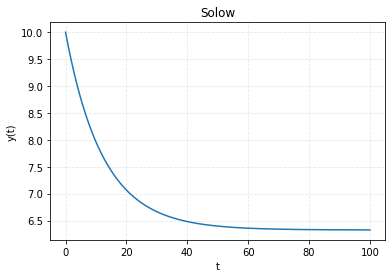

In [ ]:
a = 0
b = 100
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol_solow(0)
for i in range(1, n + 1):
	y[i] = y[i - 1] + h * fun_solow(t[i - 1], y[i - 1])
for i in range(0, n + 1):
	sol_ex[i] = sol_solow(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, y)
#plt.plot(t, sol_ex)
plt.title('Solow')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

# Método de euler modificado

3.591120170121087e-06


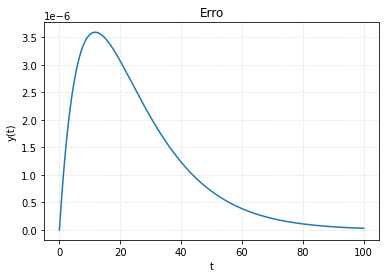

In [ ]:
a = 0
b = 100
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol_solow(t[0])
for i in range(1, n + 1):
  k1 = fun_solow(t[i - 1], y[i - 1])
  k2 = fun_solow(t[i - 1] + h, y[i - 1] + h * k1)
  y[i] = y[i - 1] + 0.5 * h * (k1 + k2)
for i in range(0, n + 1):
	sol_ex[i] = sol_solow(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Método do ponto médio (Runge Kutta de ordem 2)

3.7500043124083504e-06


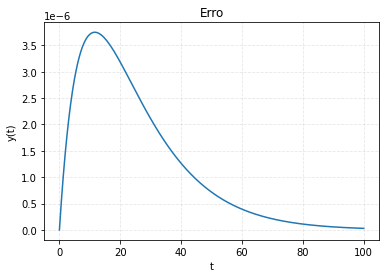

In [ ]:
a = 0
b = 100
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol_solow(t[0])
for i in range(1, n + 1):
  k1 = fun_solow(t[i - 1], y[i - 1])
  k2 = fun_solow(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  y[i] = y[i - 1] + h * k2
for i in range(0, n + 1):
	sol_ex[i] = sol_solow(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Runge Kutta de 4 - ordem

In [ ]:
def fun_solow(t, y):
    s = 0.4
    A = 1
    alpha = 0.3
    delta = 0.1
    n = 0.01
    fun_solow = s * A * y**alpha - (delta +n) * y;
    return fun_solow
def fun_solow_CES(t, y):
    s = 0.3
    A = 1
    alpha = 0.5
    delta = 0.1
    n = 0.015
    rho = 0.6
    fun_solow_CES = s * A * (alpha + (1 - alpha) * y**rho)**(1/rho) - (delta + n) * y;
    return fun_solow_CES   
def sol_solow(t):
    s = 0.4
    A = 1
    alpha = 0.3
    delta = 0.1
    n = 0.01  
    k0 = 3
    sol_solow = (A * s / (n + delta) + (k0**(1.0 - alpha) - A * s / (n + delta) ) * exp((alpha - 1.0) * (n + delta) * t))**(1.0 / (1.0 - alpha))
    return sol_solow 

1.6857626405908377e-12


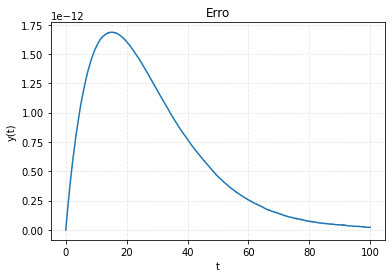

In [ ]:
a = 0
b = 100
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = sol_solow(t[0])
for i in range(1, n + 1):
  k1 = fun_solow(t[i - 1], y[i - 1])
  k2 = fun_solow(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  k3 = fun_solow(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k2)
  k4 = fun_solow(t[i - 1] +       h, y[i - 1] +       h * k3)
  y[i] = y[i - 1] + (h/6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
for i in range(0, n + 1):
	sol_ex[i] = sol_solow(t[i])
erro = abs(y - sol_ex)
erro_max = max(erro)
print(erro_max)
# Plot
plt.plot(t, erro)
plt.title('Erro')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

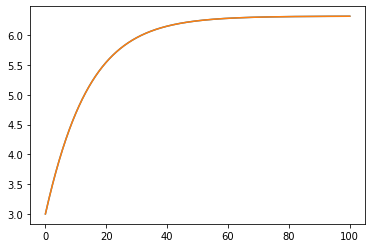

In [ ]:
plt.subplot()
plt.plot(t, y)
plt.plot(t, sol_ex)

Dimensão | Euler | Euler Modificado | Runge - kutta 2 | Runge - kutta 4 
--- | --- | --- | --- | ---
n=128  | 0.044617686001597434   |0.0009615317933988621  |0.0010061482954144552      |1.9430015374410914e-07  
n=256  | 0.02199241633925375    |0.00023467940866606085 |0.0002452900912164324      |1.1831513546667338e-08
n=512  | 0.010920720681248497   |5.797328234979915e-05  |6.056109884688965e-05     |7.297371595882396e-10
n=1024 | 0.0054415120234256875   |1.4407258696280678e-05 |1.5046724742617812e-05      |4.530598118890339e-11
n=2048 | 0.002716099117161974  |3.591120170121087e-06|3.7500043124083504e-06      |2.8244073746463982e-12

Dimensão | Euler | Euler Modificado | Runge - kutta 2 | Runge - kutta 4 
--- | --- | --- | --- | ---  
n=256/128   | 2.0288   |4.0972 |  4.1019    |16.4223
n=512/256   | 2.0138   |4.0481 |  4.0503    |16.2134
n=1024/512  | 2.0069   |4.0239 |  4.0249    |16.1069
n=2048/1024 | 2.0034   |4.0119 |  4.0125    |16.0409

## Solow - Swan CES

Partimos de equação de acumulo de capital per capita.
\begin{equation}
 \dot{\kappa}(t) = sAf(\kappa) - (\delta + n) \kappa(t). \tag{Eq. do acumulo de capital per capito}
\end{equation} 

Definindo a função CES, $$Q(L, K)=(\alpha L^\rho+ (1-\alpha)K^\rho)^\frac{1}{\rho},$$ e dividindo a mesma pela variável $L$, $$\frac{Q(L, K)}{L}=\frac{(\alpha L^\rho+ (1-\alpha)K^\rho)^\frac{1}{\rho}}{L}.$$ 

Sendo
\begin{equation*}
\begin{aligned}
f(\kappa)&=&\left(\alpha+ (1-\alpha)\left(\frac{K}{L}\right)^\rho\right)^\frac{1}{\rho}\\
f(\kappa)&=&\left(\alpha+ (1-\alpha)\kappa^\rho\right)^\frac{1}{\rho}.
\end{aligned}
\end{equation*}

Substituindo $f(\kappa)$ na equação de acumulo de capital,
\begin{equation}
 \dot{\kappa}(t) = sA\left(\alpha+ (1-\alpha)\kappa^\rho\right)^\frac{1}{\rho} - (\delta + n) \kappa(t). \tag{Eq. de Solow-Swan CES}
\end{equation} 

## Euler

10.0


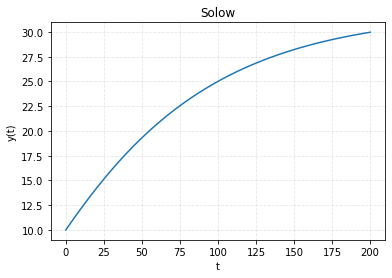

In [ ]:
a = 0
b = 200
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = 10.0
print(y[0])
for i in range(1, n + 1):
	y[i] = y[i - 1] + h * fun_solow_CES(t[i - 1], y[i - 1])
# Plot
plt.plot(t, y)
plt.title('Solow')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Euler modificado

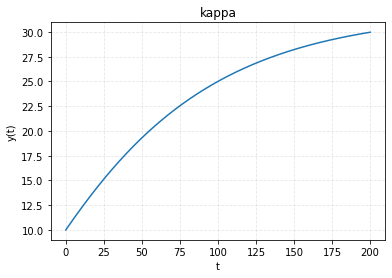

In [ ]:
a = 0
b = 200
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
sol_ex = np.linspace(0, 0, n + 1)
erro   = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = 10.0
for i in range(1, n + 1):
  k1 = fun_solow_CES(t[i - 1], y[i - 1])
  k2 = fun_solow_CES(t[i - 1] + h, y[i - 1] + h * k1)
  y[i] = y[i - 1] + 0.5 * h * (k1 + k2)
# Plot
plt.plot(t, y)
plt.title('kappa')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Método do ponto médio - Runge Kutta de 2 ordem

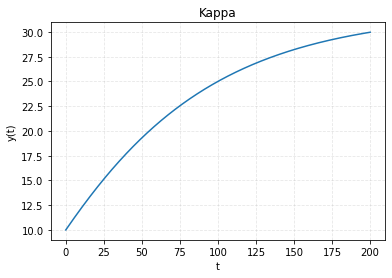

In [ ]:
a = 0
b = 200
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = 10.0
for i in range(1, n + 1):
  k1 = fun_solow_CES(t[i - 1], y[i - 1])
  k2 = fun_solow_CES(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  y[i] = y[i - 1] + h * k2
# Plot
plt.plot(t, y)
plt.title('Kappa')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Método de Runge Kutta 4 ordem 

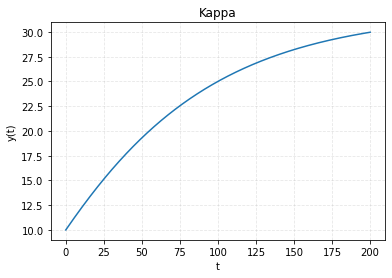

In [ ]:
a = 0
b = 200
n = 2048
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y[0] = 10
for i in range(1, n + 1):
  k1 = fun_solow_CES(t[i - 1], y[i - 1])
  k2 = fun_solow_CES(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k1)
  k3 = fun_solow_CES(t[i - 1] + 0.5 * h, y[i - 1] + 0.5 * h * k2)
  k4 = fun_solow_CES(t[i - 1] +       h, y[i - 1] +       h * k3)
  y[i] = y[i - 1] + (h/6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
# Plot
plt.plot(t, y)
plt.title('Kappa')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(alpha=.3, linestyle='--')
plt.show()

## Estudo da Estabilidade Dos Métodos Runge - Kutta

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

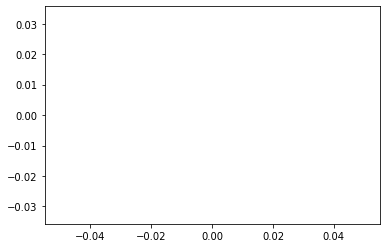

In [ ]:
def estabilidade_euler(x, y):
     z = complex(x, y)
     estabilidade_euler = np.abs(1 + z)
     return estabilidade_euler
def estabilidade_rk_2(x, y):
     z = complex(x, y)
     estabilidade_rk_2 = np.abs(1 + z + z**2/2)
     return estabilidade_rk_2
def estabilidade_rk_3(x, y):
     z = complex(x, y)
     estabilidade_rk_3 = np.abs(1 + z + z**2/2 + z**3/6)
     return estabilidade_rk_3
def estabilidade_rk_4(x, y):
     z = complex(x, y)
     estabilidade_rk_4 = np.abs(1 + z + z**2/2 + z**3 / 6 + z**4 / 24)
     return estabilidade_rk_4
a1 = -4.7
b1 =  4.7
a2 = -3
b2 =  3
n = 500
m = 500
hx = (b1 - a1) / n
hy = (b2 - a2) / m 
x      = np.linspace(0, 0, n + 1)
y      = np.linspace(0, 0, m + 1)
z2d_euler      = np.zeros(( len(x), len(y)))
z2d_rk_2       = np.zeros(( len(x), len(y)))
z2d_rk_3       = np.zeros(( len(x), len(y)))
z2d_rk_4       = np.zeros(( len(x), len(y)))
for i in range(0, n + 1):
  x[i] = a1 + i * hx
  y[i] = a2 + i * hy
cont = 0
for i in range(0, n + 1):
  for j in range(0, n + 1):
    valor_euler = estabilidade_euler(x[i], y[j])
    valor_rk_2 = estabilidade_rk_2(x[i], y[j])
    valor_rk_3 = estabilidade_rk_3(x[i], y[j])
    valor_rk_4 = estabilidade_rk_4(x[i], y[j])
    if (valor_euler < 1):
      z2d_euler[j, i] = 1
    if (valor_rk_2 < 1):
      z2d_rk_2[j, i] = 1
    if (valor_rk_3 < 1):
      z2d_rk_3[j, i] = 1
    if (valor_rk_4 < 1):
      z2d_rk_4[j, i] = 1 
#plt.imshow(z2d);
plt.axis('equal')
#plt.contourf(x, y, z2d_rk_4, 20, cmap='RdGy')



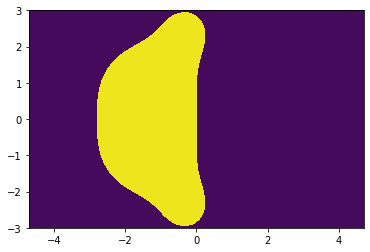

In [ ]:
plt.contourf(x, y, z2d_rk_4, 20)

Sistema de EDO - Runge Kutta 4 ordem

In [ ]:
def fun_cos_sen1(t, y1, y2):
    fun_cos_sen1 = np.sin(t) + np.cos(y1) + np.sin(y2)
    return fun_cos_sen1
def fun_cos_sen2(t, y1, y2):
    fun_cos_sen2 = np.cos(t) + np.sin(y2)
    return fun_cos_sen2

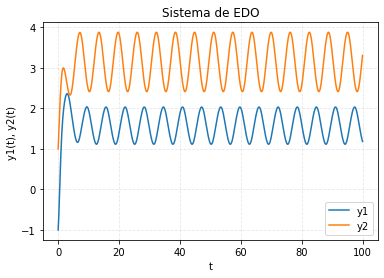

In [ ]:
a = 0
b = 100
n = 1000
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y1      = np.linspace(0, 0, n + 1)
y2      = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y1[0] = -1
y2[0] =  1
for i in range(1, n + 1):
  k1y1 = fun_cos_sen1(t[i - 1], y1[i - 1], y2[i - 1])
  k2y1 = fun_cos_sen1(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k1y1, y2[i - 1] + 0.5 * h * k1y1) 
  k3y1 = fun_cos_sen1(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k2y1, y2[i - 1] + 0.5 * h * k2y1)
  k4y1 = fun_cos_sen1(t[i - 1] +       h, y1[i - 1] +       h * k3y1, y2[i - 1] +       h * k3y1)
  k1y2 = fun_cos_sen2(t[i - 1], y1[i - 1], y2[i - 1])
  k2y2 = fun_cos_sen2(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k1y2, y2[i - 1] + 0.5 * h * k1y2) 
  k3y2 = fun_cos_sen2(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k2y2, y2[i - 1] + 0.5 * h * k2y2)
  k4y2 = fun_cos_sen2(t[i - 1] +       h, y1[i - 1] +       h * k3y2, y2[i - 1] +       h * k3y2)  
  y1[i] = y1[i - 1] + (h/6.0) * (k1y1 + 2.0 * k2y1 + 2.0 * k3y1 + k4y1)
  y2[i] = y2[i - 1] + (h/6.0) * (k1y2 + 2.0 * k2y2 + 2.0 * k3y2 + k4y2)
# Plot
fig, ax = plt.subplots()
plt.plot(t, y1, label = "y1")
plt.plot(t, y2, label = "y2")
plt.title('Sistema de EDO')
plt.xlabel('t')
plt.ylabel('y1(t), y2(t) ')
plt.grid(alpha=.3, linestyle='--')
ax.legend()
plt.show()

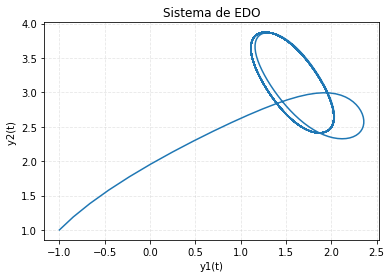

In [ ]:
plt.plot(y1, y2, label = "y1 X y1")
plt.title('Sistema de EDO')
plt.xlabel('y1(t)')
plt.ylabel('y2(t) ')
plt.grid(alpha=.3, linestyle='--')
ax.legend()
plt.show()

In [ ]:
def fun_c(t, y1, y2):
    sigma = 0.3
    alpha = 0.3
    delta = 0.1
    rho = 0.6
    fun_c = (y1/sigma) * (alpha * y2**(alpha - 1) - delta - rho)
    return fun_c
def fun_k(t, y1, y2):
    alpha = 0.3
    delta = 0.1
    eta = 0.01
    fun_k = y2**alpha - y1 - (eta + delta) * y2
    return fun_k

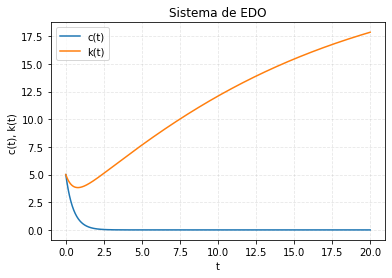

In [ ]:
a = 0
b = 20
n = 1000
n = 1000
h = (b - a) / n
t      = np.linspace(0, 0, n + 1)
y1      = np.linspace(0, 0, n + 1)
y2      = np.linspace(0, 0, n + 1)
for i in range(0, n + 1):
	t[i] = a + i * h
y1[0] = 5
y2[0] = 5
for i in range(1, n + 1):
  k1y1 = fun_c(t[i - 1], y1[i - 1], y2[i - 1])
  k2y1 = fun_c(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k1y1, y2[i - 1] + 0.5 * h * k1y1) 
  k3y1 = fun_c(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k2y1, y2[i - 1] + 0.5 * h * k2y1)
  k4y1 = fun_c(t[i - 1] +       h, y1[i - 1] +       h * k3y1, y2[i - 1] +       h * k3y1)
  k1y2 = fun_k(t[i - 1], y1[i - 1], y2[i - 1])
  k2y2 = fun_k(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k1y2, y2[i - 1] + 0.5 * h * k1y2) 
  k3y2 = fun_k(t[i - 1] + 0.5 * h, y1[i - 1] + 0.5 * h * k2y2, y2[i - 1] + 0.5 * h * k2y2)
  k4y2 = fun_k(t[i - 1] +       h, y1[i - 1] +       h * k3y2, y2[i - 1] +       h * k3y2)  
  y1[i] = y1[i - 1] + (h/6.0) * (k1y1 + 2.0 * k2y1 + 2.0 * k3y1 + k4y1)
  y2[i] = y2[i - 1] + (h/6.0) * (k1y2 + 2.0 * k2y2 + 2.0 * k3y2 + k4y2)
# Plot
fig, ax = plt.subplots()
plt.plot(t, y1, label = "c(t)")
plt.plot(t, y2, label = "k(t)")
plt.title('Sistema de EDO')
plt.xlabel('t')
plt.ylabel('c(t), k(t) ')
plt.grid(alpha=.3, linestyle='--')
ax.legend()
plt.show()

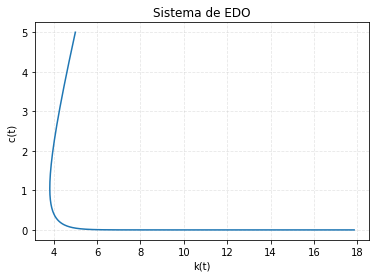

In [ ]:
plt.plot(y2, y1, label = "k(t) X c(t)")
plt.title('Sistema de EDO')
plt.xlabel('k(t)')
plt.ylabel('c(t) ')
plt.grid(alpha=.3, linestyle='--')
ax.legend()
plt.show()